In [ ]:
#Reference: Python for Microscopists by DigitalSreeni - The best channel in my opinion.
# https://www.youtube.com/watch?v=2PrzKWkqOtU

In [ ]:
%matplotlib inline

# 0006_Basic Image Denoising for Segmentation - 1000 days of Python 

In [1]:
pwd

'D:\\desktop\\Python\\1000 days of python'

In [2]:
cd reference\digitalSreeni\python_for_microscopists-master

D:\desktop\Python\1000 days of python\reference\digitalSreeni\python_for_microscopists-master


In [3]:
pwd

'D:\\desktop\\Python\\1000 days of python\\reference\\digitalSreeni\\python_for_microscopists-master'

In [18]:
#Summary
# Filters work by convolution with a moving window called a kernel.
#Convolution is nothing but multiplication of two arrays of different sizes. 
#The image will be of one size and the kernel with be of a different size, 
# #usually much smaller than image
# The input pixel is at the centre of the kernel. 
# The convolution is performed by sliding the kernel over the image, 
# $usually from top left of image.
# Linear filters and non-linear filters.
# Gaussian is an example of linear filter. 
#Non-linear filters preserve edges. 
#Median filter is an example of non-linear filter. 
#The algorithm selects the median value of all the pixels in the selected window
#NLM: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html

In [21]:
import numpy as np
import numpy
from matplotlib import pyplot as plt

## What is gaussian Kernel

[[0.00026 0.0014  0.00381 0.00532 0.00381 0.0014  0.00026]
 [0.0014  0.00742 0.02017 0.02815 0.02017 0.00742 0.0014 ]
 [0.00381 0.02017 0.05484 0.07653 0.05484 0.02017 0.00381]
 [0.00532 0.02815 0.07653 0.10681 0.07653 0.02815 0.00532]
 [0.00381 0.02017 0.05484 0.07653 0.05484 0.02017 0.00381]
 [0.0014  0.00742 0.02017 0.02815 0.02017 0.00742 0.0014 ]
 [0.00026 0.0014  0.00381 0.00532 0.00381 0.0014  0.00026]]


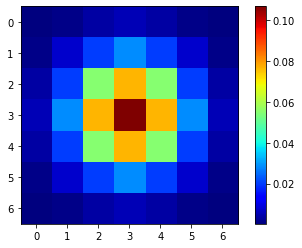

In [22]:
### What is gaussian Kernel #####

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 

gaussian_kernel_array = np.round(gaussian_kernel(3),5)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

## Denoising filters

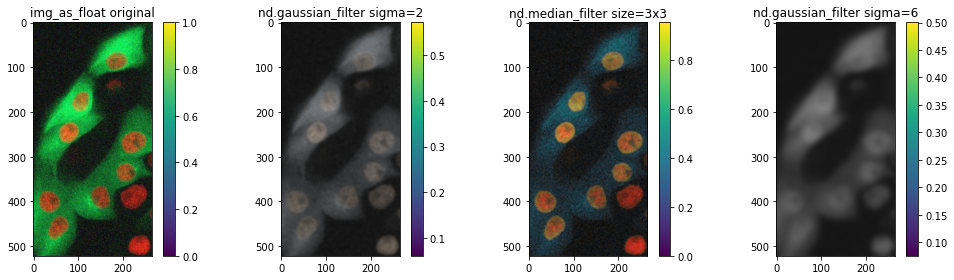

In [28]:
############################ Denoising filters ###############
from skimage import io

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(14,4))

img = img_as_float(io.imread("images/denoising/noisy_img.jpg"))
#Need to convert to float as we will be doing math on the array
plt.subplot(1,4,1)
plt.imshow(img)
plt.title('img_as_float original')
plt.colorbar()

from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=2)
plt.imsave("images/gaussian.jpg", gaussian_img)
plt.subplot(1,4,2)
plt.imshow(gaussian_img)
plt.title('nd.gaussian_filter sigma=2')
plt.colorbar()

median_img = nd.median_filter(img, size=3)
plt.imsave("images/median.jpg", median_img)
plt.subplot(1,4,3)
plt.imshow(median_img)
plt.title('nd.median_filter size=3x3')
plt.colorbar()

gaussian_img = nd.gaussian_filter(img, sigma=6)
plt.imsave("images/gaussian.jpg", gaussian_img)
plt.subplot(1,4,4)
plt.imshow(gaussian_img)
plt.title('nd.gaussian_filter sigma=6')
plt.colorbar()

plt.tight_layout()
plt.show()

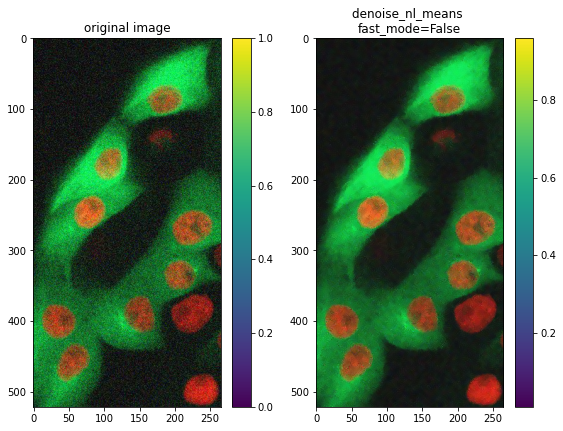

In [29]:
##### NLM#####
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.colorbar()

#Estimate sigma value
sigma_est = np.mean(estimate_sigma(img, multichannel=True))


patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.subplot(1,2,2)
plt.imshow(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.imsave("images/NLM.jpg",denoise_img)
plt.title('denoise_nl_means \nfast_mode=False')
plt.colorbar()
plt.tight_layout()
plt.show()

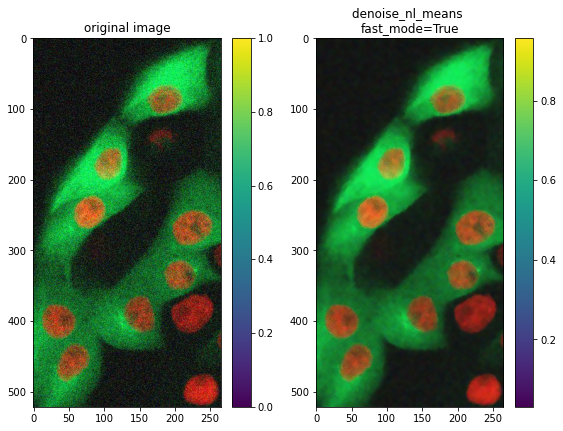

In [30]:
##### NLM#####
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original image')
plt.colorbar()

#Estimate sigma value
sigma_est = np.mean(estimate_sigma(img, multichannel=True))


patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.subplot(1,2,2)
plt.imshow(denoise_img)
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.imsave("images/NLM.jpg",denoise_img)
plt.title('denoise_nl_means \nfast_mode=True')
plt.colorbar()
plt.tight_layout()
plt.show()

### Denoising multiple images

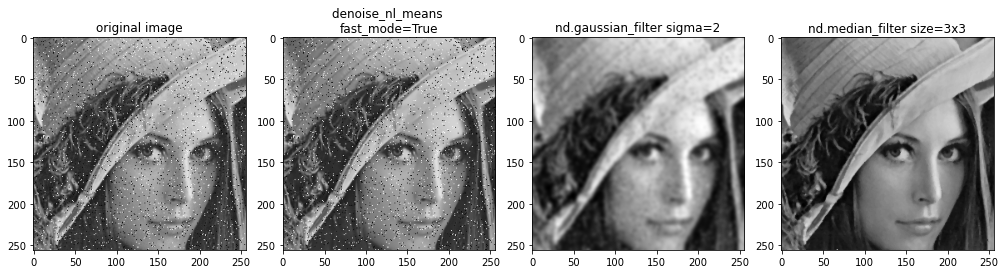

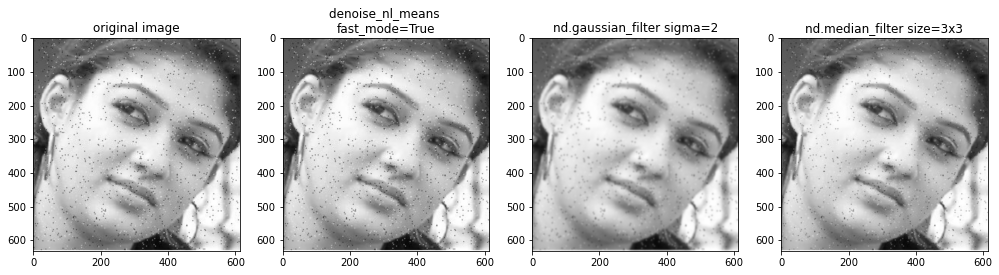

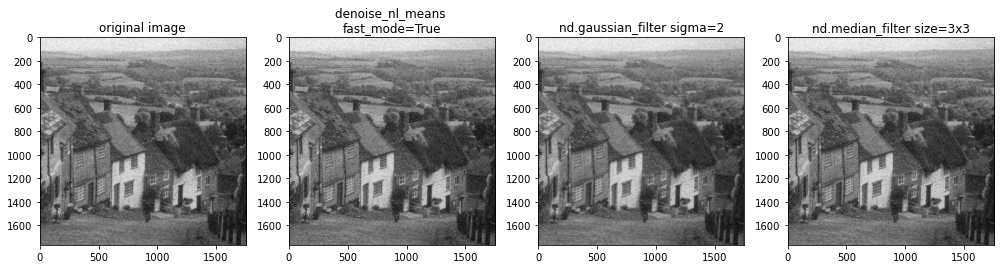

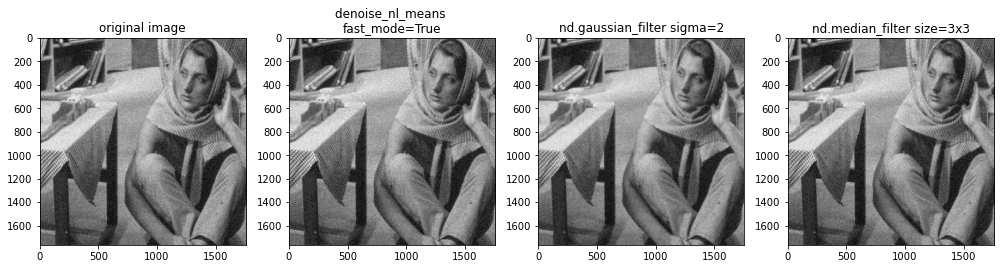

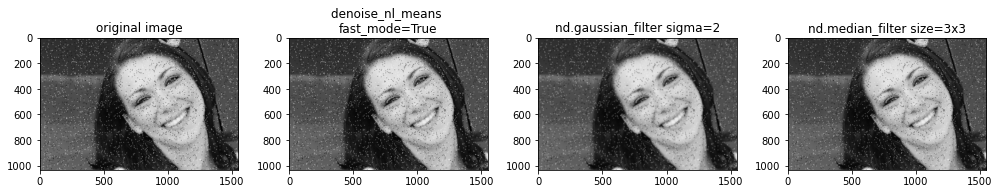

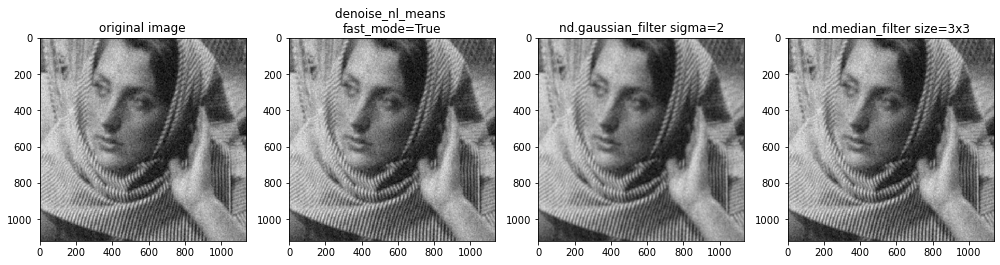

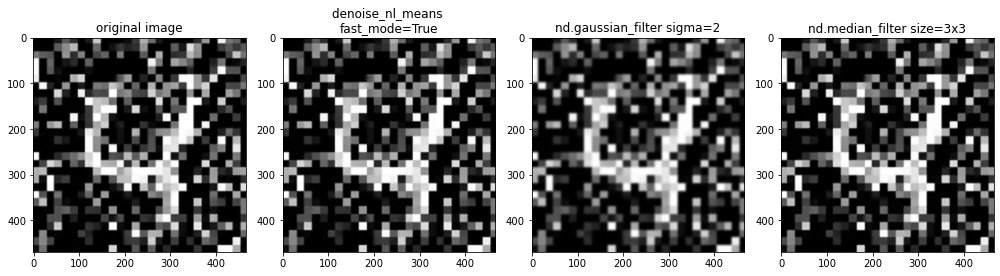

In [17]:
### NLM#####
import glob
path = "images/denoising/download/*.*"

for file in glob.glob(path):

    img = img_as_float(io.imread(file))

    plt.figure(figsize=(14,6))

    plt.subplot(1,4,1)
    plt.imshow(img,cmap='gray')
    plt.title('original image')
    # plt.colorbar()

    #Estimate sigma value
    sigma_est = np.mean(estimate_sigma(img, multichannel=True))


    patch_kw = dict(patch_size=5,      
                    patch_distance=3,  
                    multichannel=True)

    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                                   patch_size=5, patch_distance=3, multichannel=True)
    """
    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               **patch_kw)
    """
    denoise_img_as_8byte = img_as_ubyte(denoise_img)

    plt.subplot(1,4,2)
    plt.imshow(denoise_img,cmap='gray')
    #plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
    plt.imsave("images/NLM.jpg",denoise_img)
    plt.title('denoise_nl_means \nfast_mode=True')
    # plt.colorbar()
    
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=2)
    plt.imsave("images/gaussian.jpg", gaussian_img)
    plt.subplot(1,4,3)
    plt.imshow(gaussian_img,cmap='gray')
    plt.title('nd.gaussian_filter sigma=2')
#     plt.colorbar()

    median_img = nd.median_filter(img, size=3)
    plt.imsave("images/median.jpg", median_img)
    plt.subplot(1,4,4)
    plt.imshow(median_img,cmap='gray')
    plt.title('nd.median_filter size=3x3')
#     plt.colorbar()    
    
    plt.tight_layout()
    plt.show()

In [11]:
#Not so good results: How to improve?